[plotstyle.init_style] matplotlib style initialized
latex False backend module://matplotlib_inline.backend_inline


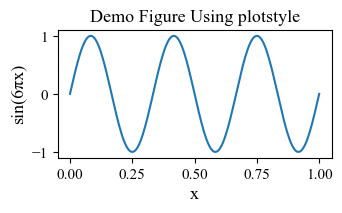

In [ ]:
from plotstyle.style import init_style, set_size, save_fig, COLORS, FONT_SIZE, LINE_STYLES, MARKERS, LATEX_DOC_WIDTH, DPI, FIG_FORMAT, TRANSPARENCY, _check_latex_available
import numpy as np
import matplotlib.pyplot as plt
init_style(quiet=False)

# Simple demo figure to confirm styling
fig, ax = plt.subplots(figsize=set_size(fraction=0.6))
ax.plot(np.linspace(0,1,200), np.sin(6*np.pi*np.linspace(0,1,200)), color=COLORS[0])
ax.set_xlabel('x')
ax.set_ylabel('sin(6πx)')
ax.set_title('Demo Figure Using plotstyle')
plt.show()

## Scientific Notation with LaTeX Formatting

The `format_sci_notation()` function provides properly formatted scientific notation for plot labels and text. This is especially important in scientific publications where numbers need consistent and precise representation.

Key features:
- Converts numbers to LaTeX-formatted scientific notation (e.g., $1.2 \times 10^3$ instead of 1200)
- Handles very large and very small numbers elegantly
- Simplifies when the coefficient is 1 (e.g., $10^6$ instead of $1 \times 10^6$)
- Options to customize decimal places and LaTeX delimiters

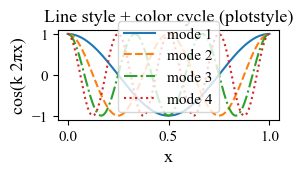

In [ ]:
# Additional figure with explicit use of plotstyle constants
from qspectro2d.config.paths import FIGURES_TESTS_DIR
from plotstyle import COLORS, LINE_STYLES, set_size, save_fig, latex_available, format_sci_notation

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=set_size())
for i, ls in enumerate(LINE_STYLES[:4]):
    ax.plot(np.linspace(0,1,400), np.cos((i+1)*2*np.pi*np.linspace(0,1,400)), linestyle=ls, color=COLORS[i], label=f'mode {i+1}')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('cos(k 2πx)')
ax.set_title('Line style + color cycle (plotstyle)')
plt.show()

## Font Selection and Text Rendering

The module helps maintain consistent typography by:

1. **Font Selection**: Automatically choosing the best serif font available on your system
   - Preferred order: Palatino, CMU Serif, Times New Roman
   - Falls back gracefully if preferred fonts aren't available

2. **LaTeX vs. Mathtext**: Detecting LaTeX availability and configuring accordingly
   - Uses real LaTeX rendering if available for professional typesetting
   - Falls back to matplotlib's built-in mathtext renderer if LaTeX isn't installed

3. **Font Size Matching**: Converting between LaTeX and matplotlib point sizes
   - Uses `calculate_matching_font_size()` to ensure consistent sizing

Let's examine the current font configuration:

Font Settings:
 - Active family setting: ['serif']
 - Preferred serif cascade: ['cmu serif', 'times new roman', 'serif']
 - Example resolved first-serif target: cmu serif
 - LaTeX available: True
 - FONT_SIZE (mpl logical points): 11.00


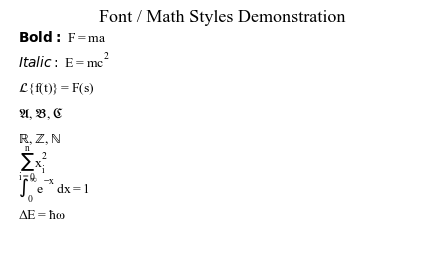

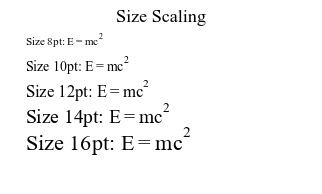

In [ ]:
import matplotlib as mpl
import matplotlib.font_manager as fm

print(f" - LaTeX available: {latex_available}")
print(f" - FONT_SIZE (mpl logical points): {FONT_SIZE:.2f}")

fig, ax = plt.subplots(figsize=set_size(width_pt=LATEX_DOC_WIDTH, fraction=0.75))
samples = [
    r"$\mathbf{Bold:}\; F=ma$",
    r"$\mathit{Italic:}\; E=mc^2$",
    r"$\mathcal{L}\{f(t)\}=F(s)$",
    r"$\mathfrak{A},\mathfrak{B},\mathfrak{C}$",
    r"$\mathbb{R},\mathbb{Z},\mathbb{N}$",
    r"$\sum_{i=0}^{n} x_i^2$",
    r"$\int_0^{\infty} e^{-x}\,dx=1$",
    r"$\Delta E = \hbar\omega$",
]
for i, txt in enumerate(samples):
    ax.text(0.02, 0.95 - i*0.11, txt, transform=ax.transAxes, fontsize=FONT_SIZE*0.9)
ax.set_axis_off()
ax.set_title(r"Font / Math Styles Demonstration")
plt.show()

# Font size scaling line
fig, ax = plt.subplots(figsize=set_size(width_pt=LATEX_DOC_WIDTH, fraction=0.55))
for j, sz in enumerate([8, 10, 12, 14, 16]):
    ax.text(0.05, 0.9 - j*0.17, fr"Size {sz}pt: $E=mc^2$", fontsize=sz)
ax.set_axis_off()
ax.set_title(r"Size Scaling")
plt.show()

## Saving Figures Consistently

The `save_fig()` function provides a consistent way to save figures across your project:

- Supports multiple file formats in one call (png, pdf, svg, etc.)
- Automatically creates directories if they don't exist
- Uses consistent DPI and transparency settings
- Applies tight bounding box for optimal layout

This helps maintain a consistent look and feel for all figures in your thesis.

# Using LaTeX-compatible plotting in notebooks

This notebook demonstrates how to use the `plotstyle` module in Jupyter notebooks for professional, LaTeX-compatible scientific plotting.

The `plotstyle.py` module provides consistent matplotlib settings for the Master's thesis project and handles:
- LaTeX-compatible text rendering (when LaTeX is available)
- Consistent figure sizing based on your LaTeX document width
- Scientific notation formatting
- Font selection and sizing
- Automatic backend detection for different environments
- Figure saving in multiple formats

You can import the module at the beginning of any script to apply these settings automatically.

## Example Plot with Scientific Formatting

Let's create a plot with proper scientific formatting using our LaTeX settings.

In [4]:
from scipy.special import factorial
# Function to generate data
def quantum_oscillator(t, omega, n):
    """Generate quantum harmonic oscillator wavefunction probability density."""
    # Hermite polynomial (physicist's version)
    def hermite(x, n):
        if n == 0:
            return np.ones_like(x)
        elif n == 1:
            return 2 * x
        else:
            return 2 * x * hermite(x, n-1) - 2 * (n-1) * hermite(x, n-2)
    
    # Constants
    hbar = 1.0  # Normalized units
    m = 1.0     # Normalized mass
    
    # Position space
    x = np.linspace(-5, 5, 1000)
    
    # Angular frequency and time evolution
    phase = omega * t
    
    # Normalization constant
    norm = 1.0 / (np.sqrt(2**n * factorial(n) * np.sqrt(np.pi)))
    
    # Wavefunction (time-independent part)
    psi = norm * hermite(x, n) * np.exp(-x**2 / 2) * np.exp(-1j * (n + 0.5) * phase)
    
    # Probability density
    prob_density = np.abs(psi)**2
    
    return x, prob_density

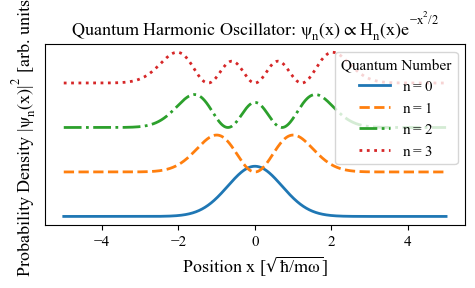

In [ ]:
# Create a figure with optimal size for LaTeX
fig, ax = plt.subplots(figsize=set_size(width_pt=LATEX_DOC_WIDTH, fraction=0.8))

# Generate data for different quantum states
t = 0  # Initial time
omega = 1.0  # Angular frequency
max_n = 4  # Maximum quantum number

# Plot different quantum states with appropriate formatting
for n in range(max_n):
    x, prob = quantum_oscillator(t, omega, n)
    
    # Plot with proper styling
    ax.plot(x, prob + n*0.5,  # Offset for visibility
            color=f'C{n}',
            linestyle=LINE_STYLES[n % len(LINE_STYLES)],
            linewidth=2,
            label=f'$n={n}$')
    
# Add proper labels with LaTeX formatting
ax.set_xlabel(r'Position $x$ [$\sqrt{\hbar/m\omega}$]')
ax.set_ylabel(r'Probability Density $|\psi_n(x)|^2$ [arb. units]')

# Set title with LaTeX equation
ax.set_title(r'Quantum Harmonic Oscillator: $\psi_n(x) \propto H_n(x)e^{-x^2/2}$')

# Add legend
ax.legend(title=r'Quantum Number', frameon=True, loc='upper right')

# Remove y-ticks as they are arbitrary
ax.set_yticks([])

# Show the plot
plt.tight_layout()
plt.show()

## Saving Figures

Use the `save_fig` function to save figures consistently:

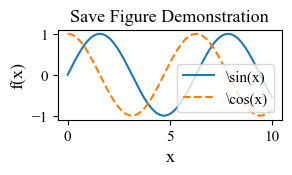

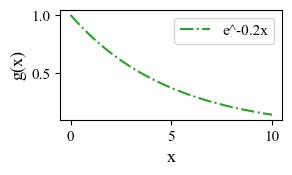

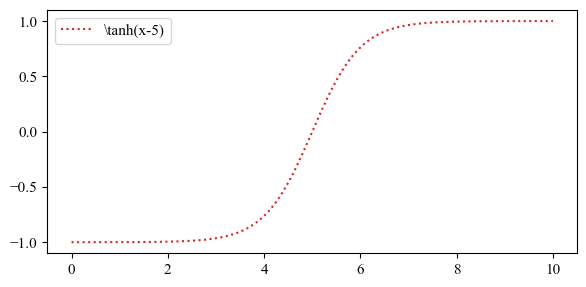

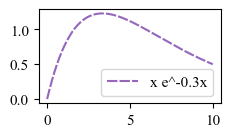

In [6]:
from pathlib import Path  # relies on earlier import of qspectro2d.config.mpl_tex_settings
fig, ax = plt.subplots(figsize=set_size(width_pt=LATEX_DOC_WIDTH, fraction=0.5))
x        = np.linspace(0, 10, 200)
ax.plot(x, np.sin(x), color='C0', linestyle='solid', label=r'$\sin(x)$')
ax.plot(x, np.cos(x), color='C1', linestyle='dashed', label=r'$\cos(x)$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x)$')
ax.set_title(r'Save Figure Demonstration')
ax.legend()

base_dir    = FIGURES_TESTS_DIR  # from settings
save_fig(fig, str(base_dir / 'demo_figure_default'))  # default format

# Multiple formats
fig2, ax2 = plt.subplots(figsize=set_size(width_pt=LATEX_DOC_WIDTH, fraction=0.5))
ax2.plot(x, np.exp(-0.2*x), color='C2', linestyle='dashdot', label=r'$e^{-0.2x}$')
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$g(x)$')
ax2.legend()
save_fig(fig2, str(base_dir / 'demo_figure_multiformat'), formats=['png','svg','pdf'])

# High DPI + size override
fig3, ax3 = plt.subplots()
ax3.plot(x, np.tanh(x-5), color='C3', linestyle='dotted', label=r'$\tanh(x-5)$')
ax3.legend()
save_fig(fig3, str(base_dir / 'demo_figure_highres'), formats=['png'], dpi=300, figsize=(6,3))

# Custom subdirectory
custom_dir = base_dir / 'notebook_examples'
custom_dir.mkdir(parents=True, exist_ok=True)
fig4, ax4 = plt.subplots(figsize=set_size(width_pt=LATEX_DOC_WIDTH, fraction=0.4))
ax4.plot(x, x*np.exp(-0.3*x), color='C4', linestyle=(0,(5,1)), label=r'$x e^{-0.3x}$')
ax4.legend()
save_fig(fig4, str(custom_dir / 'demo_figure_custom_dir'), formats=['png'])

## Using Scientific Notation

The `format_sci_notation` function helps with properly formatted scientific notation:

Scientific notation samples:
  1.000e-04 -> $10^{-4}$
  1.000e+03 -> $10^{3}$
  2.500e-06 -> $2.5 \cdot 10^{-6}$
  1.000e+05 -> $10^{5}$


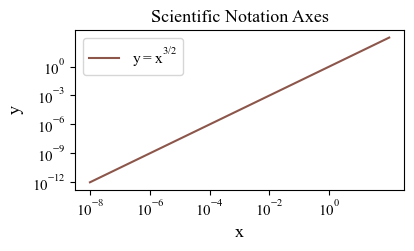

In [7]:
vals = [0.0001, 1000, 2.5e-6, 1e5]
print("Scientific notation samples:")
for v in vals:
    print(f" {v: .3e} -> {format_sci_notation(v)}")

fig, ax = plt.subplots(figsize=set_size(width_pt=LATEX_DOC_WIDTH, fraction=0.7))
x = np.logspace(-8, 2, 800)
y = x**1.5
ax.loglog(x, y, color='C5', linestyle='solid', label=r'$y = x^{3/2}$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
sel_xt = [1e-8,1e-6,1e-4,1e-2,1e0]
ax.set_xticks(sel_xt)
ax.set_xticklabels([format_sci_notation(v) for v in sel_xt])
sel_yt = [1e-12,1e-9,1e-6,1e-3,1]
ax.set_yticks(sel_yt)
ax.set_yticklabels([format_sci_notation(v) for v in sel_yt])
ax.set_title(r'Scientific Notation Axes')
ax.legend()
plt.show()

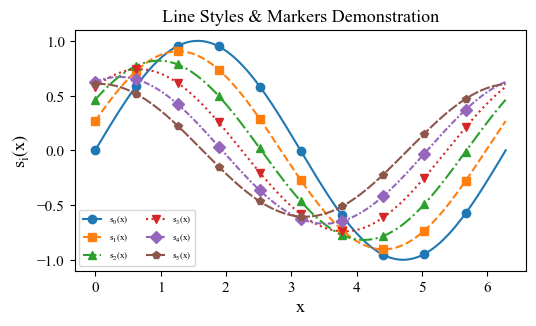

In [8]:
fig, ax = plt.subplots(figsize=set_size(width_pt=LATEX_DOC_WIDTH, fraction=0.9))
x = np.linspace(0, 2*np.pi, 400)
for i, (ls, mk) in enumerate(zip(LINE_STYLES, MARKERS)):
    y = np.sin(x + i*0.3) * np.exp(-0.1*i)
    ax.plot(x, y, color=f'C{i%10}', linestyle=ls, marker=mk, markevery=40,
            label=fr'$s_{i}(x)$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$s_i(x)$')
ax.set_title(r'Line Styles & Markers Demonstration')
ax.legend(ncol=2, fontsize=FONT_SIZE*0.6)
plt.show()

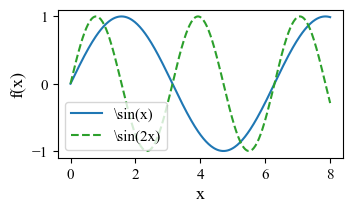

In [9]:
# =============================
# Force non-interactive backend and save a simple plot
# =============================
fig, ax = plt.subplots(figsize=set_size(width_pt=LATEX_DOC_WIDTH, fraction=0.6))
x = np.linspace(0, 8, 300)
ax.plot(x, np.sin(x), color='C0', linestyle='solid', label=r'$\sin(x)$')
ax.plot(x, np.sin(2*x), color='C2', linestyle='dashed', label=r'$\sin(2x)$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x)$')
ax.legend()
save_fig(fig, str(FIGURES_TESTS_DIR / 'non_interactive_sin_x'), formats=['png'])

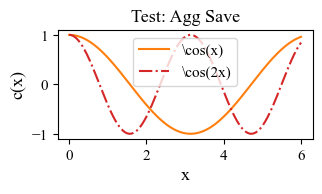

In [10]:
x = np.linspace(0, 6, 250)
fig, ax = plt.subplots(figsize=set_size(width_pt=LATEX_DOC_WIDTH, fraction=0.55))
ax.plot(x, np.cos(x), color='C1', linestyle='solid', label=r'$\cos(x)$')
ax.plot(x, np.cos(2*x), color='C3', linestyle='dashdot', label=r'$\cos(2x)$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$c(x)$')
ax.set_title(r'Test: Agg Save')
ax.legend()
save_fig(fig, str(FIGURES_TESTS_DIR / 'test_plot_agg'), formats=['png'])

Original: $\Delta E = \hbar\omega$  |  Stripped: \Delta E = \hbaromega
Original: $\mathrm{H}_2\mathrm{O}$  |  Stripped: H_2O
Original: $\propto A_{\mu}$  |  Stripped: ~ A_mu


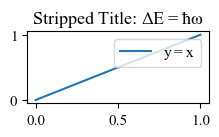

In [11]:
from plotstyle.style import _strip_latex
examples = [r"$\Delta E = \hbar\omega$", r"$\mathrm{H}_2\mathrm{O}$", r"$\propto A_{\mu}$"]
for t in examples:
    print(f"Original: {t}  |  Stripped: {_strip_latex(t)}")

fig, ax = plt.subplots(figsize=set_size(width_pt=LATEX_DOC_WIDTH, fraction=0.4))
ax.set_title(r'Stripped Title: $\Delta E=\hbar\omega$')
ax.plot([0,1],[0,1], color='C0', linestyle='solid', label=r'$y=x$')
ax.legend()
plt.show()